<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression circle

How can ve fit a circle on four or more points?

First let's try the least squares method (LSM) to find a solution.

Unfortunately the equations are not linear, but we can change it to a quadratic equation of a single variable:

${(x - x_0)}^{2} + {(y - y_0)}^{2} = r^2$

We have x and y positions of points on the circle, and we would like to find $x_0, y_0, r$.
Removing the bracket we get:

$x^2 - 2 x x_0 + {x_0}^2 + y^2 -2 y y_0 + {y_0}^2 = r^2$

Let's reorder the tags:

$y^2 + x^2  -2 x_0 x -2 y_0 y + x_0^2 + y_0^2 -r^2 = 0$

Lest substitute the unknowns:

$a_1 = -2 x_0$

$a_2 = -2 y_0$

$a_3 = x_0^2 + y_0^2 - r^2$

$x a_1 + y a_2 + a_3 =  -(x^2 + y^2)$

So we get a linear equation of three unknowns $a_1, a_2, a_3$ for each measured points, 
which is solved using numpy.

In [41]:
from math import sqrt
import numpy as np
# sample data
x = np.array([ 11.88, 10.34, 2.58, -0.29, 5.1 ])
y = np.array([  0.08,  8.59, 9.54,  1.95, -1.5 ])

In [42]:
# coefficients of unknowns
a = np.stack((x, y, np.full(x.size, 1.0)), axis=1)
# pure term
b = -(x * x + y * y)
# solution for a1, a2, a3
par = np.linalg.lstsq(a, b, rcond=None)
x0 = -0.5 * par[0][0]
y0 = -0.5 * par[0][1]
r = sqrt(x0**2 + y0**2 - par[0][2])
res = np.sqrt((x - x0)**2 + (y - y0)**2) -r
print(f"(x - {x0:.3f})^2 + (y - {y0:.3f})^2 = {r:.3f}")
print("residuals:")
print([f"{v:.3f} " for v in res])

(x - 6.169)^2 + (y - 4.092)^2 = 6.444
residuals:
['0.536 ', '-0.309 ', '0.080 ', '0.361 ', '-0.751 ']


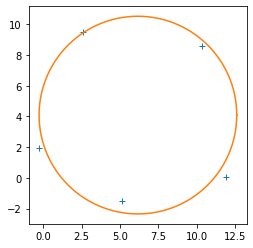

In [44]:
import matplotlib.pyplot as plt
from math import pi, sin, cos
plt.plot(x, y, '+')
plt.plot([x0 + r * cos(alfa / 180 * pi) for alfa in range(0, 361)],
         [y0 + r * sin(alfa / 180 * pi) for alfa in range(0, 361)])
plt.axis('scaled')
print("Best fitting circle")